# 과제 - 데이터 PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 로딩과 정규화

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [4]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원 축소

In [5]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- PCA 전후 분류정확도 비교

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# 원본 - 정규화 된 데이터로 LogisticRegressor을 해야 한다.
X_train ,X_test, y_train , y_test =  train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)   
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

1.0

In [10]:
# 스케일링을 하지 않은 데이터를 X로 두면, 에러가 난다.
X_train ,X_test, y_train , y_test =  train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)   
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

In [11]:
# PCA
X_train ,X_test, y_train , y_test =  train_test_split(
    cancer_pca, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)   
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

0.9649122807017544

In [17]:
# 값을 만드는 것을 함수로 만들어 보자
def pca_accuracy(X, y):
    X_train ,X_test, y_train , y_test =  train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
    )   
    lrc = LogisticRegression()
    lrc.fit(X_train, y_train)
    acc = lrc.score(X_test, y_test)
    return acc

In [18]:
for n in [0,2,5,10]: # 0은 차원축소를 거치지 않았다. 즉, 원본데이터라는 의미
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
    else:
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA:{n}:정확도는 {acc:.4f}, 설명력은 {explained:.4f}')

PCA:2:정확도는 0.9649, 설명력은 0.6324
PCA:5:정확도는 0.9912, 설명력은 0.8473
PCA:10:정확도는 0.9912, 설명력은 0.9516


In [23]:
# 또는, 이렇게 풀어도 된다
for n in [2,5,10,0]: # 0은 차원축소를 거치지 않았다. 즉, 원본데이터라는 의미
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터 - 정확도: {acc:.4f}')
    else:
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA:{n}:정확도는 {acc:.4f}, 설명력은 {explained:.4f}')

PCA:2:정확도는 0.9649, 설명력은 0.6324
PCA:5:정확도는 0.9912, 설명력은 0.8473
PCA:10:정확도는 0.9912, 설명력은 0.9516
원 데이터 - 정확도: 1.0000


- 시각화

In [19]:
pca = PCA(n_components=2)
cancer_data = pca.fit_transform(cancer_std)
df['PC1'] = cancer_pca[:,0]
df['PC2'] = cancer_pca[:,1]

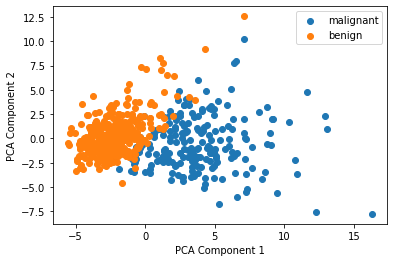

In [22]:
markers = ['s', 'o']

for i in range(2):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()